In [105]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [148]:
ieee=pd.read_csv('https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/master/metadata.csv')
ieee.shape

(950, 30)

In [3]:
ieee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               950 non-null    object 
 1   offset                  697 non-null    float64
 2   sex                     870 non-null    object 
 3   age                     713 non-null    float64
 4   finding                 950 non-null    object 
 5   RT_PCR_positive         593 non-null    object 
 6   survival                361 non-null    object 
 7   intubated               248 non-null    object 
 8   intubation_present      250 non-null    object 
 9   went_icu                397 non-null    object 
 10  in_icu                  335 non-null    object 
 11  needed_supplemental_O2  90 non-null     object 
 12  extubated               37 non-null     object 
 13  temperature             78 non-null     float64
 14  pO2_saturation          119 non-null    fl

In [4]:
kaggle=pd.read_csv('https://raw.githubusercontent.com/RashmiAPatel19/SMU-MSDS-CapstoneA/main/Data/metadata.csv')
kaggle.shape

(94621, 6)

In [5]:
kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94621 entries, 0 to 94620
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientid  94621 non-null  object
 1   sex        94621 non-null  object
 2   age        94621 non-null  object
 3   finding    94621 non-null  object
 4   modality   94621 non-null  object
 5   filename   94621 non-null  object
dtypes: object(6)
memory usage: 4.3+ MB


In [6]:
kaggle.modality.value_counts()

CT       93802
X-ray      819
Name: modality, dtype: int64

In [7]:
kaggle_xray=kaggle[kaggle['modality']=='X-ray']
kaggle_xray.shape

(819, 6)

In [8]:
ieee['data_ref']='IEEE'
ieee.shape

(950, 31)

In [9]:
kaggle_xray['data_ref']='Kaggle'
kaggle_xray.shape

C:\Users\ARTHPA~1\AppData\Local\Temp/ipykernel_14996/180048210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaggle_xray['data_ref']='Kaggle'


(819, 7)

In [10]:
kaggle_xray

,patientid,sex,age,finding,modality,filename,data_ref
0,PID_2,M,65.0,COVID-19,X-ray,PID_2_auntminnie-a-2020_01_28_23_51_6665_2020_...,Kaggle
1,PID_4,F,52.0,COVID-19,X-ray,PID_4_nejmc2001573_f1a,Kaggle
2,PID_6,Unknown,Unknown,COVID-19,X-ray,PID_6_lancet-case2a,Kaggle
3,PID_11,M,56.0,COVID-19,X-ray,PID_11_1-s2.0-S0140673620303706-fx1_lrg,Kaggle
4,PID_12,M,42.0,COVID-19,X-ray,PID_12_nCoV-radiol.2020200269.fig1-day7,Kaggle
...,...,...,...,...,...,...,...
94616,IM-0755,Unknown,Unknown,NON-COVID,X-ray,IM-0755-0001,Kaggle
94617,IM-0757,Unknown,Unknown,NON-COVID,X-ray,IM-0757-0001,Kaggle
94618,IM-0761,Unknown,Unknown,NON-COVID,X-ray,IM-0761-0001,Kaggle
94619,IM-0764,Unknown,Unknown,NON-COVID,X-ray,IM-0764-0001,Kaggle


In [11]:
kaggle_xray['data_ref']

0        Kaggle
1        Kaggle
2        Kaggle
3        Kaggle
4        Kaggle
          ...  
94616    Kaggle
94617    Kaggle
94618    Kaggle
94619    Kaggle
94620    Kaggle
Name: data_ref, Length: 819, dtype: object

In [12]:
ieee.modality.value_counts()

X-ray    866
CT        84
Name: modality, dtype: int64

In [13]:
ieee_xray=ieee[ieee['modality']=='X-ray']
ieee_xray.shape

(866, 31)

In [14]:
ieee_xray.rename({'RT_PCR_positive':'Covid-Detection'},axis=1,inplace=True)
ieee_xray.columns

C:\Users\ARTH PATEL\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Index(['patientid', 'offset', 'sex', 'age', 'finding', 'Covid-Detection',
       'survival', 'intubated', 'intubation_present', 'went_icu', 'in_icu',
       'needed_supplemental_O2', 'extubated', 'temperature', 'pO2_saturation',
       'leukocyte_count', 'neutrophil_count', 'lymphocyte_count', 'view',
       'modality', 'date', 'location', 'folder', 'filename', 'doi', 'url',
       'license', 'clinical_notes', 'other_notes', 'Unnamed: 29', 'data_ref'],
      dtype='object')

In [15]:
kaggle_xray.rename({'finding':'Covid-Detection'},axis=1,inplace=True)
kaggle_xray.columns

Index(['patientid', 'sex', 'age', 'Covid-Detection', 'modality', 'filename',
       'data_ref'],
      dtype='object')

In [16]:
merge= pd.concat([ieee_xray, kaggle_xray], axis=0)
merge.shape


(1685, 31)

In [17]:
merge.data_ref.value_counts()

IEEE      866
Kaggle    819
Name: data_ref, dtype: int64

In [18]:
merge.tail(819)

,patientid,offset,sex,age,finding,Covid-Detection,survival,intubated,intubation_present,went_icu,...,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29,data_ref
0,PID_2,NaN,M,65.0,NaN,COVID-19,NaN,NaN,NaN,NaN,...,NaN,NaN,PID_2_auntminnie-a-2020_01_28_23_51_6665_2020_...,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle
1,PID_4,NaN,F,52.0,NaN,COVID-19,NaN,NaN,NaN,NaN,...,NaN,NaN,PID_4_nejmc2001573_f1a,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle
2,PID_6,NaN,Unknown,Unknown,NaN,COVID-19,NaN,NaN,NaN,NaN,...,NaN,NaN,PID_6_lancet-case2a,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle
3,PID_11,NaN,M,56.0,NaN,COVID-19,NaN,NaN,NaN,NaN,...,NaN,NaN,PID_11_1-s2.0-S0140673620303706-fx1_lrg,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle
4,PID_12,NaN,M,42.0,NaN,COVID-19,NaN,NaN,NaN,NaN,...,NaN,NaN,PID_12_nCoV-radiol.2020200269.fig1-day7,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94616,IM-0755,NaN,Unknown,Unknown,NaN,NON-COVID,NaN,NaN,NaN,NaN,...,NaN,NaN,IM-0755-0001,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle
94617,IM-0757,NaN,Unknown,Unknown,NaN,NON-COVID,NaN,NaN,NaN,NaN,...,NaN,NaN,IM-0757-0001,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle
94618,IM-0761,NaN,Unknown,Unknown,NaN,NON-COVID,NaN,NaN,NaN,NaN,...,NaN,NaN,IM-0761-0001,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle
94619,IM-0764,NaN,Unknown,Unknown,NaN,NON-COVID,NaN,NaN,NaN,NaN,...,NaN,NaN,IM-0764-0001,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle


In [19]:
merge['Covid-Detection'].value_counts()

NON-COVID    532
Y            315
COVID-19     287
Unclear      194
Name: Covid-Detection, dtype: int64

In [20]:
merge['Covid-Detection'].replace('Y','COVID-19', inplace=True)

In [21]:
merge['Covid-Detection'].value_counts()

COVID-19     602
NON-COVID    532
Unclear      194
Name: Covid-Detection, dtype: int64

In [22]:
# merge=pd.read_csv('https://raw.githubusercontent.com/RashmiAPatel19/SMU-MSDS-CapstoneA/main/Data/covid_merged_data.csv')
# merge.head(55)

In [23]:
# del merge['Unnamed: 0']
# merge.columns

In [24]:
merge['age'].value_counts()
merge['age'].replace('Unknown',None, inplace=True)
merge['age'] = merge['age'].astype(float, errors = 'raise')
print(merge['age'].min())
print(merge['age'].max())
print(merge['age'].median())
print(merge['age'].mean())

18.0
94.0
70.0
62.06872852233677


In [25]:
bins= [0,40,60,100]
labels = ['Young','Mid-Aged','Old-Aged']
merge['AgeGroup'] = pd.cut(merge['age'], bins=bins, labels=labels, right=False)

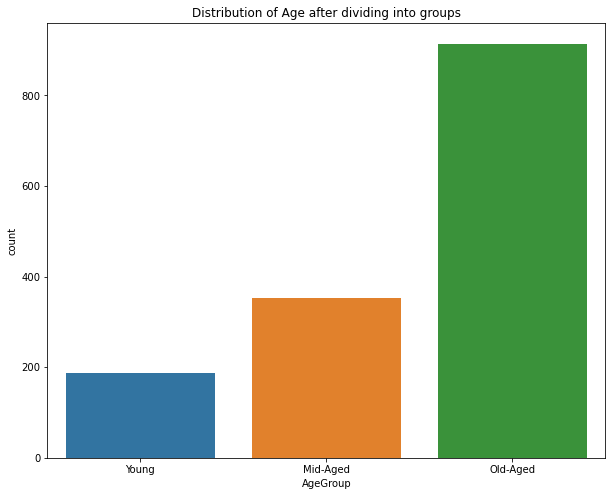

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(x ='AgeGroup', data = merge)
plt.title('Distribution of Age after dividing into groups')
# Show the plot
plt.show()

### Separating the .png/.jpeg/.jpg extensions from file names in folders

In [129]:
names[0]

'C:/Users/ARTH PATEL/OneDrive - Southern Methodist University/RP-MSDS/Capstone/Experimental/separate-data/covid/PID_112_1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png'

In [134]:
names=cov_names+non_cov_names
len(names)
names[0]

'C:/Users/ARTH PATEL/OneDrive - Southern Methodist University/RP-MSDS/Capstone/Experimental/separate-data/covid/PID_112_1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png'

In [34]:
base=os.path.basename(names[0])
print(base)
# 'file.ext'
print(os.path.splitext(base))
#('file', '.ext')
print(os.path.splitext(base)[0])
#'file'

PID_112_1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png
('PID_112_1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a', '.png')
PID_112_1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a


In [77]:
# Storing filename with extesion, extension and filename in three different arrays
full=[]
extension=[]
striped=[]
for i in names:
    base=os.path.basename(i)
    temp=os.path.splitext(base)[0]
    ext=os.path.splitext(base)[1]
    striped.append(temp)
    extension.append(ext)
    full.append(base)
# print(striped)
print(len(striped))
# print(extension)
print(len(extension))
print(len(full))

819
819
819


In [79]:
print(full[10])
print(striped[10])
print(extension[10])

PID_137_A7E260CE-8A00-4C5F-A7F5-27336527A981.jpeg
PID_137_A7E260CE-8A00-4C5F-A7F5-27336527A981
.jpeg


### Separating the Kaggle images from merged dataframe and stroing in new dataframe

In [80]:
xray=merge[merge['data_ref']=='Kaggle']
print(xray.shape)
print(xray.columns)


(819, 32)
Index(['patientid', 'offset', 'sex', 'age', 'finding', 'Covid-Detection',
       'survival', 'intubated', 'intubation_present', 'went_icu', 'in_icu',
       'needed_supplemental_O2', 'extubated', 'temperature', 'pO2_saturation',
       'leukocyte_count', 'neutrophil_count', 'lymphocyte_count', 'view',
       'modality', 'date', 'location', 'folder', 'filename', 'doi', 'url',
       'license', 'clinical_notes', 'other_notes', 'Unnamed: 29', 'data_ref',
       'AgeGroup'],
      dtype='object')


In [37]:
xray.reset_index(inplace=True)

In [38]:
filename=xray.filename.tolist()
type(filename)

list

In [39]:
files=[]
for i in range(xray.shape[0]):
    if filename[i] in striped:
        files.append(filename[i])
    else:
        print('no')
len(files)

819

In [40]:
xray.filename

0      PID_2_auntminnie-a-2020_01_28_23_51_6665_2020_...
1                                 PID_4_nejmc2001573_f1a
2                                    PID_6_lancet-case2a
3                PID_11_1-s2.0-S0140673620303706-fx1_lrg
4                PID_12_nCoV-radiol.2020200269.fig1-day7
                             ...                        
814                                         IM-0755-0001
815                                         IM-0757-0001
816                                         IM-0761-0001
817                                         IM-0764-0001
818                                         IM-0766-0001
Name: filename, Length: 819, dtype: object

In [41]:
young=[]
mid=[]
old=[]
for i in range(xray.shape[0]):
    if xray.AgeGroup[i]=='Young':
       # print('Young',xray.filename[i])
        young.append(xray.filename[i])
    elif xray.AgeGroup[i]=='Mid-Aged':
       # print('Mid',xray.filename[i])
        mid.append(xray.filename[i])
    else:
       # print('Old',xray.filename[i])
        old.append(xray.filename[i])
        
print(len(young)) 
print(len(mid)) 
print(len(old)) 

53
127
639


In [96]:
old

['PID_2_auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus',
 'PID_22_covid-19-pneumonia-7-PA',
 'PID_23_covid-19-pneumonia-14-PA',
 'PID_24_covid-19-pneumonia-12',
 'PID_33_7C69C012-7479-493F-8722-ABC29C60A2DD',
 'PID_36_8FDE8DBA-CFBD-4B4C-B1A4-6F36A93B7E87',
 'PID_38_F051E018-DAD1-4506-AD43-BE4CA29E960B',
 'PID_41_7AF6C1AF-D249-4BD2-8C26-449304105D03',
 'PID_42_1B734A89-A1BF-49A8-A1D3-66FAFA4FAC5D',
 'PID_44_85E52EB3-56E9-4D67-82DA-DEA247C82886',
 'PID_45_6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7',
 'PID_48_2C26F453-AF3B-4517-BB9E-802CF2179543',
 'PID_49_93FE0BB1-022D-4F24-9727-987A07975FFB',
 'PID_50_B59DD164-51D5-40DF-A926-6A42DD52EBE8',
 'PID_52_5CBC2E94-D358-401E-8928-965CCD965C5C',
 'PID_54_80446565-E090-4187-A031-9D3CEAA586C8',
 'PID_55_7E335538-2F86-424E-A0AB-6397783A38D0',
 'PID_56_D7AF463C-2369-492D-908D-BE1911CCD74C',
 'PID_57_all14238-fig-0001-m-b',
 'PID_60_ciaa199.pdf-001-a',
 'PID_70_7D2CF6CE-F529-4470-8356-D33FFAF98600',
 'PID_71_171CB377-62FF-4B76-906C-F3787

In [99]:
old_file=[]
for i in range(819):
    if striped[i] in old:
        print('yes')
        old_file.append(full_path_names[i])
        count+=1
    else:
        print('no')
print(old_file)

no
no
no
no
no
no
yes
no
no
yes
yes
yes
no
no
yes
yes
yes
yes
no
no
yes
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
yes
no
yes
yes
yes
no
yes
no
yes
no
no
yes
yes
yes
yes
no
no
yes
no
no
no
no
yes
no
yes
yes
no
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
yes
no
no
no
no
no
no
no
no
yes
no
no
no
no
no
no
no
no
no
no
yes
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
yes
yes
yes
yes
no
no
yes
yes
yes
yes
yes
yes
yes
no
yes
no
yes
yes
yes
no
yes
no
no
yes
yes
no
no
yes
no
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
no
no
no
no
no
no
no
yes
no
yes
yes
yes
no
no
no
yes
yes
yes
no
yes
no
no
no
no
no
yes
no
no
no
no
yes
no
no
no
yes
yes
no
no
no
yes
no
yes
yes
yes
no
yes
no
no
yes
yes
yes
yes
yes
yes
no
no
no
no
yes
no
no
no
no
yes
yes
no
yes
no
yes
no
yes
yes
yes
yes
no
no
yes
no
no
no
no
no
no
no
no
yes
yes
yes
yes
no
yes
no
yes
yes
no
yes
no
no
no
yes
no
yes
no
no
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes

In [101]:
old_dir='C:/Users/ARTH PATEL/OneDrive - Southern Methodist University/RP-MSDS/Capstone/Experimental/separate-data/old-age/'
old_pic=[os.path.join(old_dir,filename) for filename in old_file]
#print the list
print(len(old_pic))

639


In [ ]:
#Splitting the covid images list into 80-20 
train_covid_list, test_covid_list = train_test_split(old_pic, test_size=0.20, random_state=1234)

print(len(train_covid_list))
print(len(test_covid_list))

In [57]:
len(striped)

819

In [91]:

from distutils.file_util import copy_file
count=0
for i in range(819):
    if striped[i] in old:
        print('yes')
        copy_file(full_path_names[i], old_dir)
        count+=1
    else:
        print('no')
print(count)

no
no
no
no
no
no
yes
no
no
yes
yes
yes
no
no
yes
yes
yes
yes
no
no
yes
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
yes
no
yes
yes
yes
no
yes
no
yes
no
no
yes
yes
yes
yes
no
no
yes
no
no
no
no
yes
no
yes
yes
no
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
yes
no
no
no
no
no
no
no
no
yes
no
no
no
no
no
no
no
no
no
no
yes
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
yes
yes
yes
yes
no
no
yes
yes
yes
yes
yes
yes
yes
no
yes
no
yes
yes
yes
no
yes
no
no
yes
yes
no
no
yes
no
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
no
no
no
no
no
no
no
yes
no
yes
yes
yes
no
no
no
yes
yes
yes
no
yes
no
no
no
no
no
yes
no
no
no
no
yes
no
no
no
yes
yes
no
no
no
yes
no
yes
yes
yes
no
yes
no
no
yes
yes
yes
yes
yes
yes
no
no
no
no
yes
no
no
no
no
yes
yes
no
yes
no
yes
no
yes
yes
yes
yes
no
no
yes
no
no
no
no
no
no
no
no
yes
yes
yes
yes
no
yes
no
yes
yes
no
yes
no
no
no
yes
no
yes
no
no
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes

In [62]:
xray.rename({'index':'image_number'},axis=1,inplace=True)


C:\Users\ARTH PATEL\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [68]:
img_num=[]
for i in range(xray.shape[0]):
    if xray.AgeGroup[i]=='Old-Aged':
        img_num.append(xray.image_number)
len(img_num)

639

In [27]:
main_dir="C:/Users/ARTH PATEL/OneDrive - Southern Methodist University/RP-MSDS/Capstone/Experimental/"



In [28]:
#set the path to the train dir
df=os.path.join(main_dir,'separate-data/')
df

'C:/Users/ARTH PATEL/OneDrive - Southern Methodist University/RP-MSDS/Capstone/Experimental/separate-data/'

In [29]:
#directory with the covid images
covid_dir=os.path.join(df,'covid/')
print(covid_dir)
#directory with the non-covid images
non_covid_dir=os.path.join(df,'non-covid/')
print(non_covid_dir)

C:/Users/ARTH PATEL/OneDrive - Southern Methodist University/RP-MSDS/Capstone/Experimental/separate-data/covid/
C:/Users/ARTH PATEL/OneDrive - Southern Methodist University/RP-MSDS/Capstone/Experimental/separate-data/non-covid/


In [30]:
covid_names=os.listdir(covid_dir)
print(covid_names[:10])
print(len(covid_names))
print('=======================================================')
non_covid_names=os.listdir(non_covid_dir)
print(non_covid_names[:10])
print(len(non_covid_names))

['PID_112_1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png', 'PID_113_1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2a.png', 'PID_114_1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3a.png', 'PID_115_1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4a.png', 'PID_116_covid-19-pneumonia-24-day6.jpg', 'PID_117_covid-19-pneumonia-evolution-over-a-week-1-day0-PA.jpg', 'PID_118_53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg', 'PID_11_1-s2.0-S0140673620303706-fx1_lrg.jpg', 'PID_12_nCoV-radiol.2020200269.fig1-day7.jpeg', 'PID_132_covid-19-pneumonia-23-day1.jpg']
287
['IM-0115-0001.jpeg', 'IM-0117-0001.jpeg', 'IM-0119-0001.jpeg', 'IM-0122-0001.jpeg', 'IM-0125-0001.jpeg', 'IM-0127-0001.jpeg', 'IM-0128-0001.jpeg', 'IM-0129-0001.jpeg', 'IM-0131-0001.jpeg', 'IM-0133-0001.jpeg']
532


### Combining the path and filename and stroing in array.

In [109]:
train_cov_dir='C:/Users/ARTH PATEL/OneDrive - Southern Methodist University/RP-MSDS/Capstone/Experimental/separate-data/old-age/train/covid'
test_cov_dir='C:/Users/ARTH PATEL/OneDrive - Southern Methodist University/RP-MSDS/Capstone/Experimental/separate-data/old-age/test/covid'
train_ncov_dir='C:/Users/ARTH PATEL/OneDrive - Southern Methodist University/RP-MSDS/Capstone/Experimental/separate-data/old-age/train/normal'
test_ncov_dir='C:/Users/ARTH PATEL/OneDrive - Southern Methodist University/RP-MSDS/Capstone/Experimental/separate-data/old-age/test/normal'
print(train_cov_dir)
print(test_cov_dir)
print(train_ncov_dir)
print(test_ncov_dir)

C:/Users/ARTH PATEL/OneDrive - Southern Methodist University/RP-MSDS/Capstone/Experimental/separate-data/old-age/train/covid
C:/Users/ARTH PATEL/OneDrive - Southern Methodist University/RP-MSDS/Capstone/Experimental/separate-data/old-age/test/covid
C:/Users/ARTH PATEL/OneDrive - Southern Methodist University/RP-MSDS/Capstone/Experimental/separate-data/old-age/train/normal
C:/Users/ARTH PATEL/OneDrive - Southern Methodist University/RP-MSDS/Capstone/Experimental/separate-data/old-age/test/normal


In [130]:
cov_names=[]
for i  in covid_names:
    temp=os.path.join(covid_dir,i)
    cov_names.append(temp)
len(cov_names)
cov_names[0]

'C:/Users/ARTH PATEL/OneDrive - Southern Methodist University/RP-MSDS/Capstone/Experimental/separate-data/covid/PID_112_1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png'

In [110]:
#Splitting the covid images list into 80-20 
train_covid_list, test_covid_list = train_test_split(cov_names, test_size=0.20, random_state=1234)

print(len(train_covid_list))
print(len(test_covid_list))

229
58


In [111]:
# Move train covid images files to new training  folders
for i in range(229):
        copy_file(train_covid_list[i], train_cov_dir)
    

In [112]:
# Move train covid images files to new training  folders
for i in range(58):
        copy_file(test_covid_list[i], test_cov_dir)
    

In [107]:
non_cov_names=[]
for i  in non_covid_names:
    temp=os.path.join(non_covid_dir,i)
    non_cov_names.append(temp)
len(non_cov_names)

532

In [113]:
#Splitting the normal images list into 80-20 
train_normal_list, test_normal_list = train_test_split(non_cov_names, test_size=0.20, random_state=1234)

print(len(train_normal_list))
print(len(test_normal_list))

425
107


In [114]:
# Move train covid images files to new training  folders
for i in range(425):
        copy_file(train_normal_list[i], train_ncov_dir)


In [115]:
# Move train covid images files to new training  folders
for i in range(107):
        copy_file(train_normal_list[i], test_ncov_dir)


In [ ]:
# 
for i in range(819):
    if striped[i] in old:
        print('yes')
        old_file.append(full_path_names[i])
        count+=1
    else:
        print('no')
print(old_file)

In [90]:
full_path_names=cov_names+non_cov_names
len(full_path_names)

819

In [31]:
full_names=covid_names+non_covid_names
len(full_names)

819

In [128]:
full_names[0]

'PID_112_1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png'

# Splitting the IEEE data

In [122]:
main_dir='C:/Users/ARTH PATEL/OneDrive - Southern Methodist University/RP-MSDS/Capstone/covid-chestxray-dataset-master/images/'

In [123]:
ieee_images=os.listdir(main_dir)
print(ieee_images[:10])

['000001-1.jpg', '000001-1.png', '000001-10.jpg', '000001-11.jpg', '000001-12.jpg', '000001-13.jpg', '000001-14.jpg', '000001-15.jpg', '000001-17.jpg', '000001-18.jpg']


In [137]:
ieee=merge[merge['data_ref']=='IEEE']
ieee.shape
ieee.columns

Index(['patientid', 'offset', 'sex', 'age', 'finding', 'Covid-Detection',
       'survival', 'intubated', 'intubation_present', 'went_icu', 'in_icu',
       'needed_supplemental_O2', 'extubated', 'temperature', 'pO2_saturation',
       'leukocyte_count', 'neutrophil_count', 'lymphocyte_count', 'view',
       'modality', 'date', 'location', 'folder', 'filename', 'doi', 'url',
       'license', 'clinical_notes', 'other_notes', 'Unnamed: 29', 'data_ref',
       'AgeGroup'],
      dtype='object')

In [145]:
ieee['Covid-Detection'].value_counts()

COVID-19    315
Unclear     194
Name: Covid-Detection, dtype: int64

In [146]:
ieee_covid=ieee[ieee['Covid-Detection']=='COVID-19']
ieee_covid.shape

(315, 32)

In [147]:
filename=ieee_covid.filename.tolist()
filename

['auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'nejmc2001573_f1a.jpeg',
 'nejmc2001573_f1b.jpeg',
 'lancet-case2a.jpg',
 'lancet-case2b.jpg',
 '1-s2.0-S0140673620303706-fx1_lrg.jpg',
 'nCoV-radiol.2020200269.fig1-day7.jpeg',
 'nejmoa2001191_f1-PA.jpeg',
 'nejmoa2001191_f1-L.jpeg',
 'nejmoa2001191_f3-PA.jpeg',
 'nejmoa2001191_f3-L.jpeg',
 'nejmoa2001191_f4.jpeg',
 'nejmoa2001191_f5-PA.jpeg',
 'nejmoa2001191_f5-L.jpeg',
 'ryct.2020200034.fig2.jpeg',
 'ryct.2020200034.fig5-day0.jpeg',
 'ryct.2020200034.fig5-day4.jpeg',
 'ryct.2020200034.fig5-day7.jpeg',
 'jkms-35-e79-g001-l-a.jpg',
 'jkms-35-e79-g001-l-b.jpg',
 'jkms-35-e79-g001-l-c.jpg',
 '1-s2.0-S0929664620300449-gr2_lrg-a.jpg',
 '1-s2.0-S0929664620300449-gr2_lrg-b.jpg',
 '1-s2.0-S092966

In [ ]:


from distutils.file_util import copy_file
count=0
for i in range(819):
    if striped[i] in old:
        print('yes')
        copy_file(full_path_names[i], old_dir)
        count+=1
    else:
        print('no')
print(count)

In [ ]:
for i in filename

In [143]:
ieee_covid_dir='C:/Users/ARTH PATEL/OneDrive - Southern Methodist University/RP-MSDS/Capstone/covid-chestxray-dataset-master/images/'

'C:/Users/ARTH PATEL/OneDrive - Southern Methodist University/RP-MSDS/Capstone/Experimental/separate-data/covid/'

In [ ]:
ieee_cov_names=[]
for i  in filename:
    temp=os.path.join(ieee_covid_dir,i)
    cov_names.append(temp)
len(cov_names)
cov_names[0]

In [ ]:
train_cov_dir='C:/Users/ARTH PATEL/OneDrive - Southern Methodist University/RP-MSDS/Capstone/Experimental/separate-data/old-age/train/covid'
test_cov_dir='C:/Users/ARTH PATEL/OneDrive - Southern Methodist University/RP-MSDS/Capstone/Experimental/separate-data/old-age/test/covid'


In [ ]:
#Splitting the covid images list into 80-20 
train_covid_list, test_covid_list = train_test_split(cov_names, test_size=0.20, random_state=1234)

print(len(train_covid_list))
print(len(test_covid_list))

In [ ]:
# Move train covid images files to new training  folders
for i in range(229):
        copy_file(train_covid_list[i], train_cov_dir)
 

In [ ]:
# Move train covid images files to new training  folders
for i in range(229):
        copy_file(test_covid_list[i], test_cov_dir)
 

In [ ]:
base=os.path.basename(names[0])
print(base)
# 'file.ext'
print(os.path.splitext(base))
#('file', '.ext')
print(os.path.splitext(base)[0])
#'file'